In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
fname = "../data_generated/final_results.csv"
fname2 = "../data_generated/final_results_2.csv"
fname3 = "../data_generated/final_results_3.csv"
fname4 = "../data_generated/final_results_4.csv"
res_df_p1 = pd.read_csv(fname)
res_df_p2 = pd.read_csv(fname2)
res_df_p3 = pd.read_csv(fname3)
#res_df_p4 = pd.read_csv(fname4)
res_df = pd.concat((res_df_p1, res_df_p2, res_df_p3), axis=0)

In [36]:
res_df = res_df.drop(["Unnamed: 0"], axis=1) # Artifact of saving/reloading into CSV
res_df.iloc[np.where(res_df.Weather_avg_h==-1)[0],res_df.columns.get_loc("Weather_avg_h")] = 0
res_df.iloc[np.where(res_df.History_days==-1)[0],res_df.columns.get_loc("History_days")] = 0

In [37]:
res_df

,Triage,Features,History_days,Weather_avg_h,Model,Parameters,NumTrgSamples,NumTestSamples,TrainAcc,TestAcc,Precision,Recall,F1,TP,TN,FP,FN,ImprOverMajTest,ImprOverMajTrain
0,pulse_Triage,History,3,0,1Dummy,Majority,2672,296,0.715970,0.715967,0.000000,0.000000,0.000000,0.0,212.5,0.0,84.3,0.000000,0.000000
1,pulse_Triage,History,3,0,1Dummy,Stratified,2672,296,0.546982,0.565704,0.286559,0.264892,0.274755,22.4,156.5,56.0,61.9,-0.150263,-0.168988
2,pulse_Triage,History,3,0,DT,10-None,2672,296,0.753968,0.737191,0.696679,0.247286,0.363713,20.8,203.5,9.0,63.5,0.021223,0.037998
3,pulse_Triage,History,3,0,DT,10-auto,2672,296,0.753968,0.737191,0.696679,0.247286,0.363713,20.8,203.5,9.0,63.5,0.021223,0.037998
4,pulse_Triage,History,3,0,DT,10-log2,2672,296,0.753968,0.737191,0.696679,0.247286,0.363713,20.8,203.5,9.0,63.5,0.021223,0.037998
5,pulse_Triage,History,3,0,DT,20-None,2672,296,0.753968,0.737191,0.696679,0.247286,0.363713,20.8,203.5,9.0,63.5,0.021223,0.037998
6,pulse_Triage,History,3,0,DT,20-auto,2672,296,0.753968,0.737527,0.698829,0.247286,0.364003,20.8,203.6,8.9,63.5,0.021560,0.037998
7,pulse_Triage,History,3,0,DT,20-log2,2672,296,0.753968,0.737527,0.698829,0.247286,0.364003,20.8,203.6,8.9,63.5,0.021560,0.037998
8,pulse_Triage,History,3,0,DT,5-None,2672,296,0.749438,0.739550,0.694838,0.236123,0.350677,19.9,203.8,8.7,64.4,0.023583,0.033468
9,pulse_Triage,History,3,0,DT,5-auto,2672,296,0.746443,0.739548,0.723409,0.207211,0.321000,17.6,205.9,6.6,66.7,0.023580,0.030473


Here we need to compare several parameter sets:
- Weather only
- History only
- History + weather

Within those options we need to check the dependency between history length (both for weather and triages) and accuracy/f1.

In [38]:
triages = {
  "Pulse" : res_df[res_df.Triage=='pulse_Triage'],
  "Question" : res_df[res_df.Triage=='question_Triage'],
  "SPO2" : res_df[res_df.Triage=='spo2_Triage'],
  "Manual" : res_df[res_df.Triage=='manual_Triage'],
}

In [39]:
human_readable_model_name = {
    '1Dummy' : "Majority predictor",
    'DT' : "Decision trees",
    'GBT': "Gradient boosted trees",
    'LR' : "Logistic regression",
    'RF' : "Random forests"}

# Not recommeded. We have 4 line types and more than 4 models
linestyles_by_model = {
    '1Dummy' : ':',
    'DT' : "--",
    'GBT': "-.",
    'LR' : ":",
    'RF' : "-"}

In [40]:
readable_parameter_names = {
    "F1" : "F1 score",
    "TestAcc" : "Test set accuracy",
    "Precision": "Precision",
    "Recall": "Recall",
    "TP": "True positive",
    "FP": "False positive",
    "TN": "True negative",
    "FN": "False negative",
}

In [41]:
for cur_triage_name in ["Pulse"]:
    cur_triage_df = triages[cur_triage_name]
    cur_triage_df.groupby("History_days").max()

In [42]:
cur_triage_history_only = cur_triage_df[cur_triage_df.Features=="History"]
cur_triage_weather_only = cur_triage_df[cur_triage_df.Features=="Weather"]
cur_triage_history_and_weather = cur_triage_df[cur_triage_df.Features=="Weather & History"]
print(cur_triage_history_only.groupby("History_days").max()[["TestAcc","Precision","Recall","F1"]],"\n\n",
      cur_triage_history_and_weather.groupby("History_days").max()[["TestAcc","Precision","Recall","F1"]],"\n\n",
      cur_triage_weather_only.groupby("History_days").max()[["TestAcc","Precision","Recall","F1"]])

               TestAcc  Precision    Recall        F1
History_days                                         
1             0.723048   0.610631  0.283374  0.385556
2             0.739550   0.771089  0.264892  0.370580
3             0.746959   0.778055  0.278350  0.395703
4             0.747971   0.811894  0.316349  0.421239
5             0.748980   0.849444  0.332028  0.420870
6             0.748645   0.862576  0.367259  0.438815 

                TestAcc  Precision    Recall        F1
History_days                                         
1             0.730794   0.724643  0.355761  0.365119
2             0.738198   0.822370  0.374909  0.383834
3             0.742242   0.787121  0.428576  0.417724
4             0.746623   0.868333  0.421297  0.413089
5             0.748980   0.884394  0.443098  0.427391
6             0.748642   0.862576  0.432420  0.428732 

                TestAcc  Precision    Recall        F1
History_days                                         
0             0.717654

In [43]:
print(cur_triage_weather_only.groupby("Weather_avg_h").max()[["TestAcc","Precision","Recall","F1"]],"\n\n",
      cur_triage_weather_only.groupby("Weather_avg_h").max()[["TestAcc","Precision","Recall","F1"]],"\n\n")


                TestAcc  Precision    Recall        F1
Weather_avg_h                                         
0              0.715967   0.468452  0.264892  0.274755
4              0.717654   0.591667  0.264892  0.282808
8              0.716978   0.519368  0.264892  0.275543
12             0.716978   0.513333  0.264892  0.274755 

                 TestAcc  Precision    Recall        F1
Weather_avg_h                                         
0              0.715967   0.468452  0.264892  0.274755
4              0.717654   0.591667  0.264892  0.282808
8              0.716978   0.519368  0.264892  0.275543
12             0.716978   0.513333  0.264892  0.274755 




In [44]:
best_f1_idx_hist_only = cur_triage_history_only.groupby("History_days").idxmax()["F1"]
cur_triage_history_only.loc[best_f1_idx_hist_only,:]

,Triage,Features,History_days,Weather_avg_h,Model,Parameters,NumTrgSamples,NumTestSamples,TrainAcc,TestAcc,Precision,Recall,F1,TP,TN,FP,FN,ImprOverMajTest,ImprOverMajTrain
2,pulse_Triage,History,3,0,DT,10-None,2672,296,0.753968,0.737191,0.696679,0.247286,0.363713,20.8,203.5,9.0,63.5,0.021223,0.037998
2,pulse_Triage,History,1,0,DT,10-None,2672,296,0.723046,0.723048,0.610631,0.283374,0.385556,23.8,197.1,15.4,60.5,0.007081,0.007076
2,pulse_Triage,History,2,0,DT,10-None,2672,296,0.740266,0.738203,0.705580,0.236091,0.352967,19.9,204.1,8.4,64.4,0.022236,0.024296
129,pulse_Triage,History,3,0,RF,5-10-auto,2672,296,0.752396,0.734833,0.675726,0.272341,0.385429,22.9,201.5,11.0,61.4,0.018865,0.036426
129,pulse_Triage,History,1,0,RF,5-10-auto,2672,296,0.723046,0.723048,0.610631,0.283374,0.385556,23.8,197.1,15.4,60.5,0.007081,0.007076
129,pulse_Triage,History,2,0,RF,5-10-auto,2672,296,0.739892,0.737527,0.686336,0.255093,0.370580,21.4,202.8,9.7,62.9,0.021560,0.023922
111,pulse_Triage,History,3,0,RF,20-10-auto,2672,296,0.753257,0.738534,0.692397,0.278350,0.395703,23.5,202.0,10.5,60.8,0.022567,0.037287
111,pulse_Triage,History,1,0,RF,20-10-auto,2672,296,0.723046,0.723048,0.610631,0.283374,0.385556,23.8,197.1,15.4,60.5,0.007081,0.007076
111,pulse_Triage,History,2,0,RF,20-10-auto,2672,296,0.740079,0.737191,0.702359,0.231213,0.346918,19.5,204.1,8.4,64.8,0.021223,0.024109
767,pulse_Triage,History,4,0,RF,100-None-None,2672,296,0.777553,0.728443,0.641453,0.316349,0.421239,26.5,197.5,15.0,57.8,0.012476,0.061583


In [45]:
cur_triage_history_and_weather.groupby(["History_days","Weather_avg_h"]).max()["F1"]

History_days  Weather_avg_h
1             0                0.361757
              4                0.351668
              8                0.349900
              12               0.365119
2             0                0.383834
              4                0.380158
              8                0.372741
              12               0.381405
3             0                0.412468
              4                0.417724
              8                0.413650
              12               0.401746
4             0                0.409998
              4                0.410865
              8                0.407151
              12               0.413089
5             0                0.417423
              4                0.423917
              8                0.427391
              12               0.420329
6             0                0.422420
              4                0.420363
              8                0.428732
              12               0.417071
Name: F1, dt

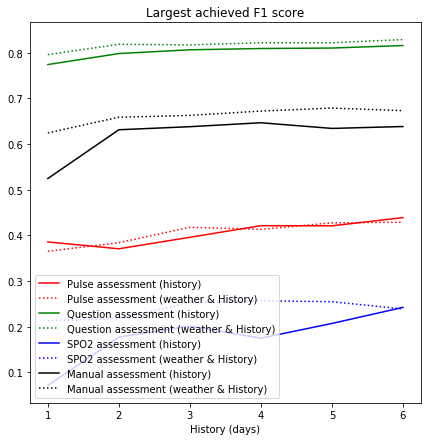

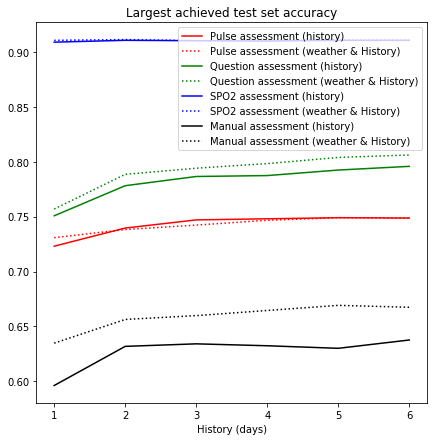

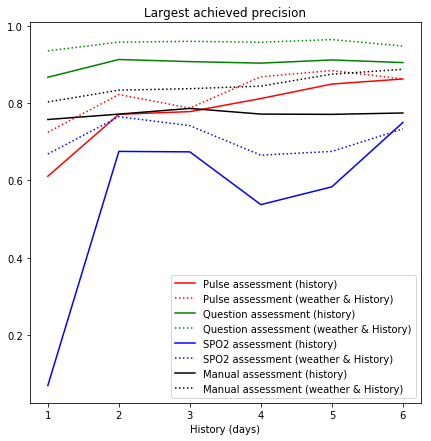

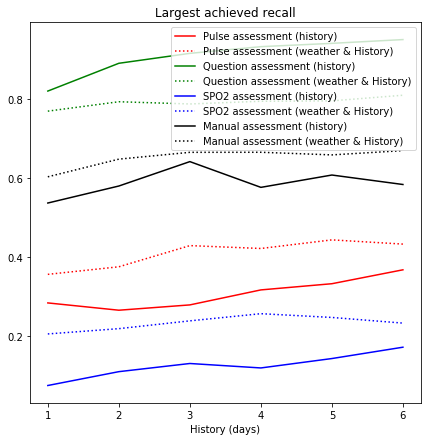

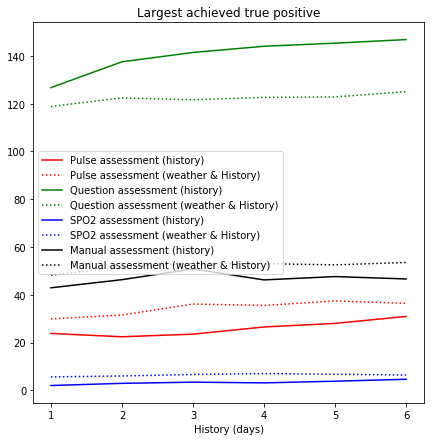

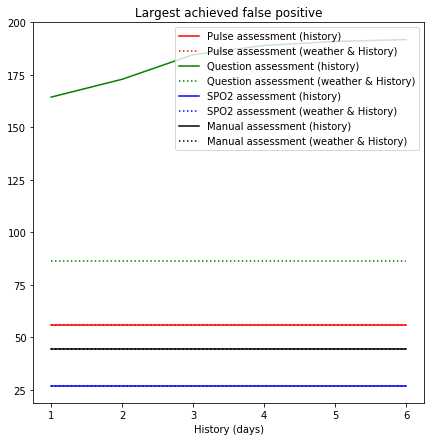

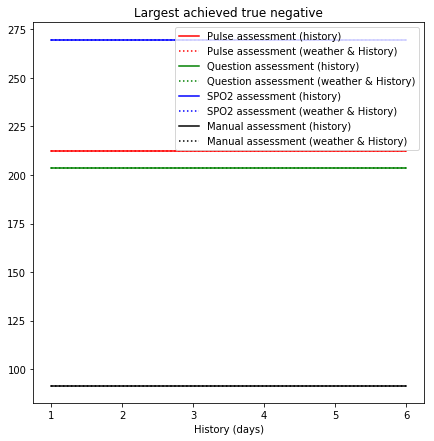

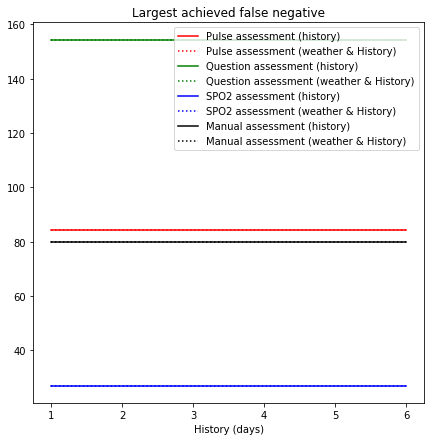

In [55]:
linestyles_by_mode = {"History": '-', "Weather & History": ':'}
colors_by_triage = {
  "Pulse" : 'red',
  "Question" : 'green',
  "SPO2" : 'blue',
  "Manual" : 'black',
}

for parameter in readable_parameter_names: 
    plt.gcf().set_size_inches(7,7)
    legend_list = list()

    for t in triages:
        cur_triage_df = triages[t]
        all_hist_days = sorted(cur_triage_df["History_days"].unique())
        
        df_by_modes = dict()
        for m in linestyles_by_mode:
            df_by_modes[m] = cur_triage_df[cur_triage_df.Features==m]
            df_by_modes[m] = pd.DataFrame(df_by_modes[m].groupby(["History_days"]).max()[parameter]).reset_index()
        
            legend_list.append(t+" assessment ("+m[0:1].lower()+m[1:]+")")
            x = list()
            y = list()
            for h in all_hist_days:
                y_par = list(df_by_modes[m][df_by_modes[m]["History_days"]==h][parameter])
                if len(y_par) > 0:
                    x.append(h)
                    y.append(y_par[0])
            plt.plot(x,y,ls=linestyles_by_mode[m],c=colors_by_triage[t])

    plt.legend(legend_list)
    if parameter == "F1":
        plt.title("Largest achieved F1 score")
    else:
        plt.title("Largest achieved "+readable_parameter_names[parameter][0:1].lower()+
              readable_parameter_names[parameter][1:])
    plt.xlabel("History (days)")
    plt.savefig(parameter+'_max_over_models.png', bbox_inches='tight')
    plt.show()

In [47]:
cur_triage_history_only.reset_index()

,index,Triage,Features,History_days,Weather_avg_h,Model,Parameters,NumTrgSamples,NumTestSamples,TrainAcc,TestAcc,Precision,Recall,F1,TP,TN,FP,FN,ImprOverMajTest,ImprOverMajTrain
0,0,pulse_Triage,History,3,0,1Dummy,Majority,2672,296,0.715970,0.715967,0.000000,0.000000,0.000000,0.0,212.5,0.0,84.3,0.000000,0.000000
1,1,pulse_Triage,History,3,0,1Dummy,Stratified,2672,296,0.546982,0.565704,0.286559,0.264892,0.274755,22.4,156.5,56.0,61.9,-0.150263,-0.168988
2,2,pulse_Triage,History,3,0,DT,10-None,2672,296,0.753968,0.737191,0.696679,0.247286,0.363713,20.8,203.5,9.0,63.5,0.021223,0.037998
3,3,pulse_Triage,History,3,0,DT,10-auto,2672,296,0.753968,0.737191,0.696679,0.247286,0.363713,20.8,203.5,9.0,63.5,0.021223,0.037998
4,4,pulse_Triage,History,3,0,DT,10-log2,2672,296,0.753968,0.737191,0.696679,0.247286,0.363713,20.8,203.5,9.0,63.5,0.021223,0.037998
5,5,pulse_Triage,History,3,0,DT,20-None,2672,296,0.753968,0.737191,0.696679,0.247286,0.363713,20.8,203.5,9.0,63.5,0.021223,0.037998
6,6,pulse_Triage,History,3,0,DT,20-auto,2672,296,0.753968,0.737527,0.698829,0.247286,0.364003,20.8,203.6,8.9,63.5,0.021560,0.037998
7,7,pulse_Triage,History,3,0,DT,20-log2,2672,296,0.753968,0.737527,0.698829,0.247286,0.364003,20.8,203.6,8.9,63.5,0.021560,0.037998
8,8,pulse_Triage,History,3,0,DT,5-None,2672,296,0.749438,0.739550,0.694838,0.236123,0.350677,19.9,203.8,8.7,64.4,0.023583,0.033468
9,9,pulse_Triage,History,3,0,DT,5-auto,2672,296,0.746443,0.739548,0.723409,0.207211,0.321000,17.6,205.9,6.6,66.7,0.023580,0.030473


In [48]:
str("AbC").lower()

'abc'

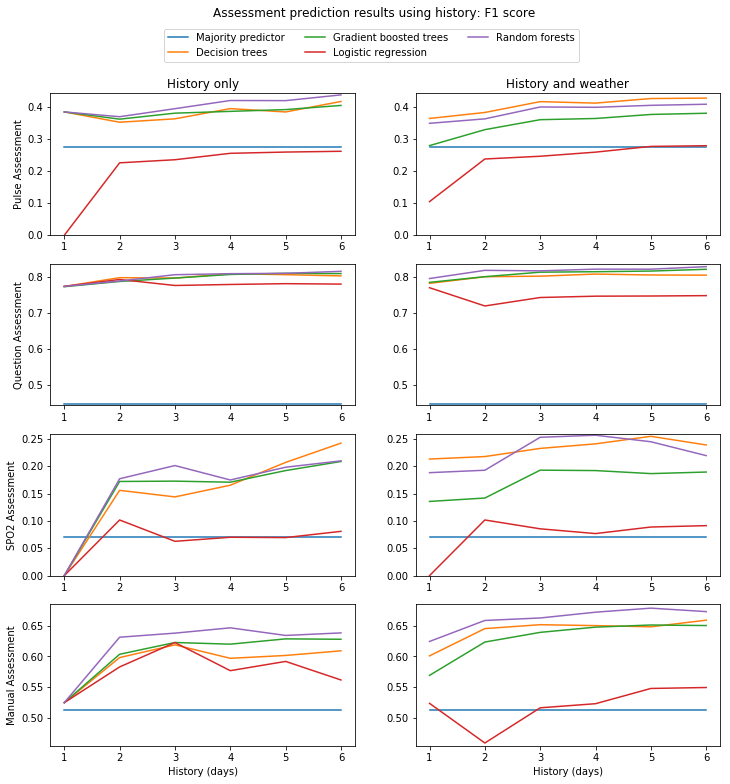

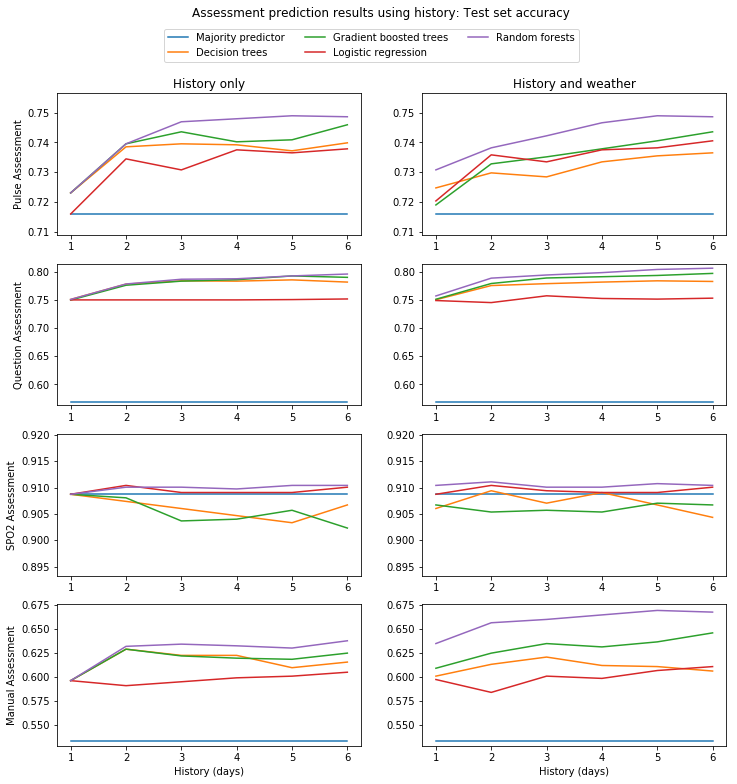

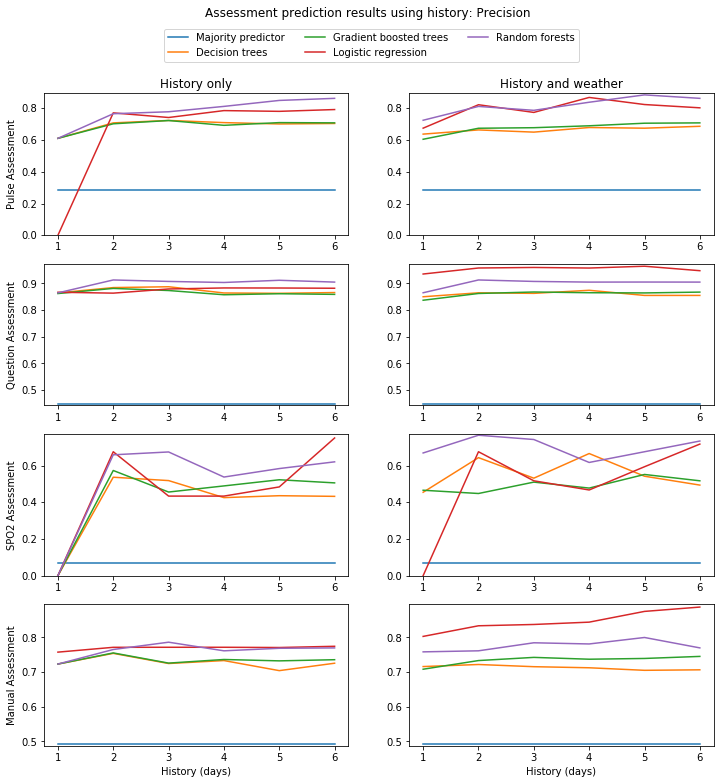

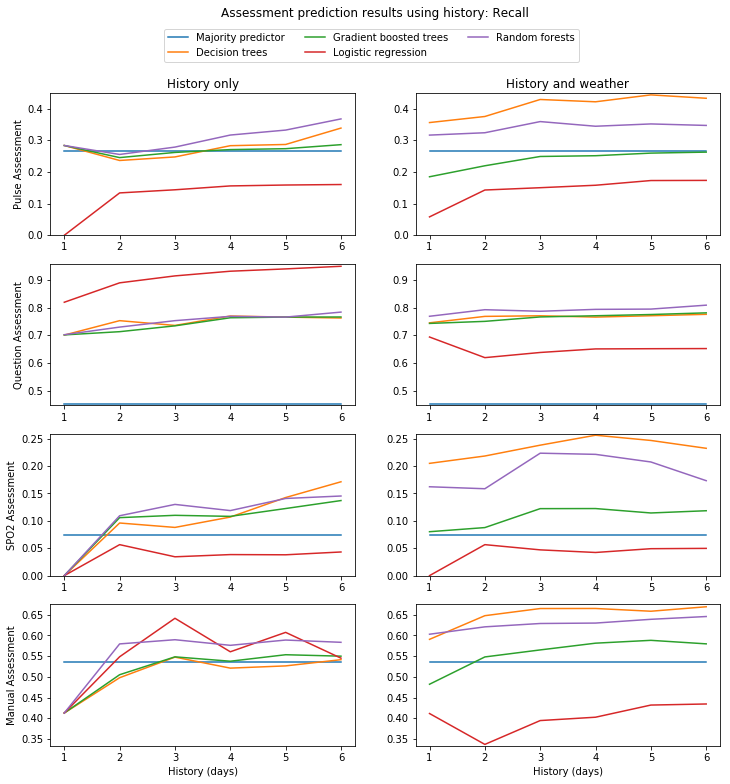

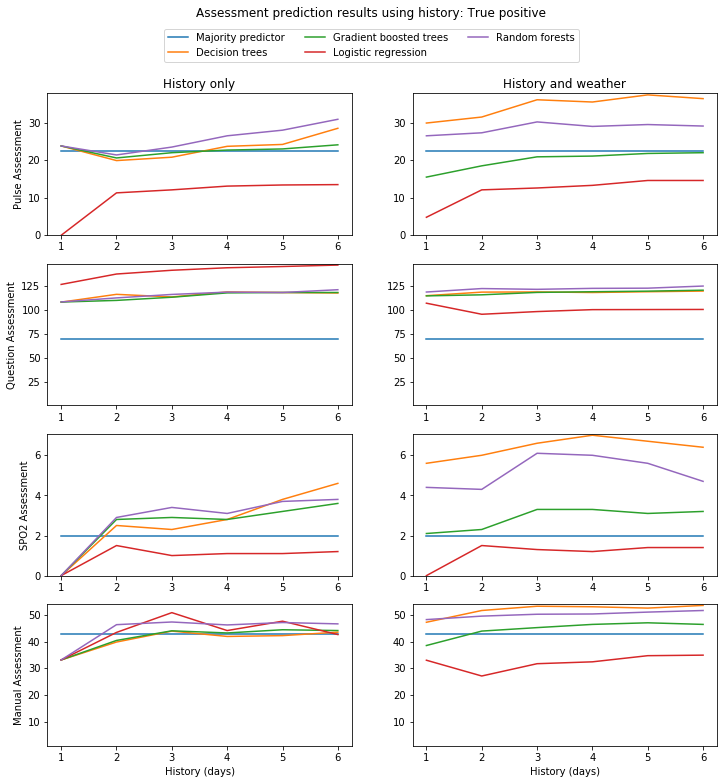

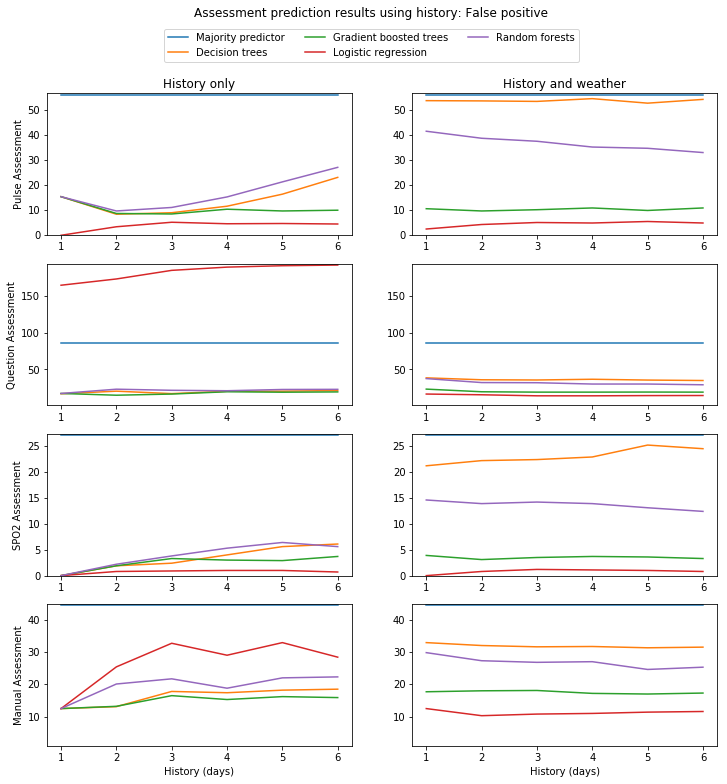

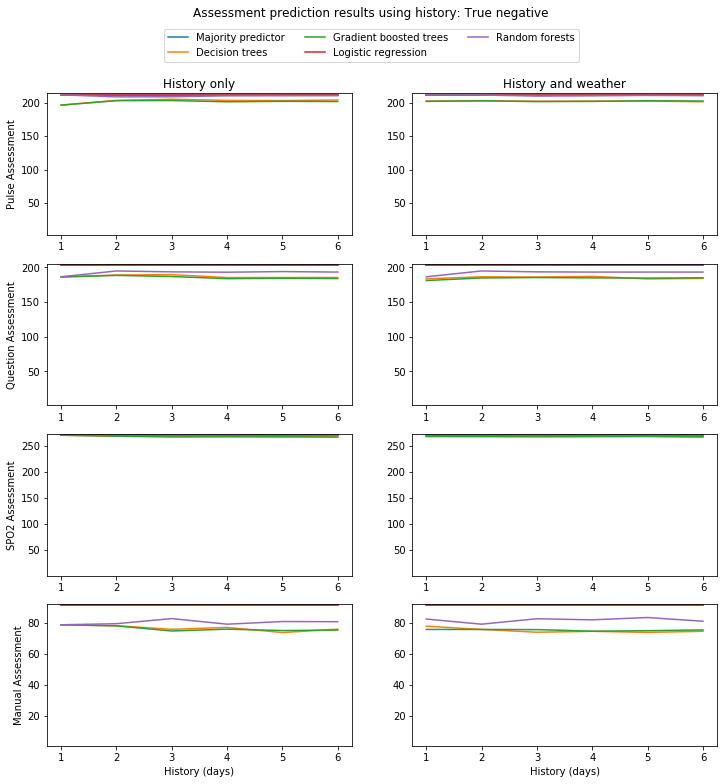

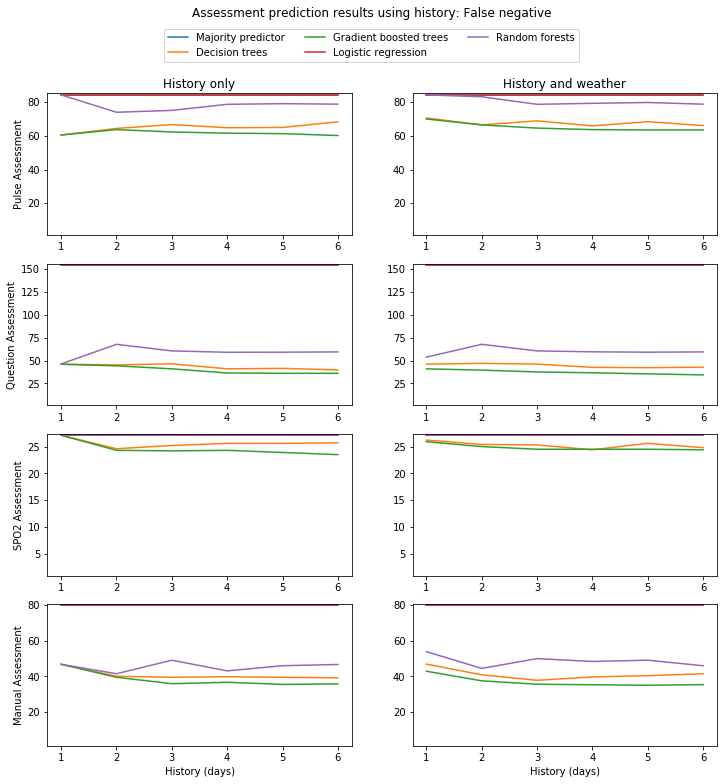

In [53]:
for parameter in readable_parameter_names.keys():
    f, ax = plt.subplots(len(triages), 2)
    f.set_size_inches(12,12)
    f.suptitle("Assessment prediction results using history: "+readable_parameter_names[parameter])

    prediction_type_list = ["History only", "History and weather"]
    triage_list = list(triages.keys())

    for i in range(len(triage_list)):
        t = triage_list[i]
        ax[i,0].set_ylabel(t + " Assessment")
        cur_triage_df = triages[t]
        cur_triage_history_only = cur_triage_df[cur_triage_df.Features=="History"]
        cur_triage_history_and_weather = cur_triage_df[cur_triage_df.Features=="Weather & History"]

        triage_by_predictor = (cur_triage_history_only, cur_triage_history_and_weather)

        min_ylim = 1
        max_ylim = 0

        for j in range(len(triage_by_predictor)):
            cur_triage_by_predictor = triage_by_predictor[j]
            f1_by_model = cur_triage_by_predictor.groupby(["History_days","Model"]).max()[parameter]
            min_ylim = np.min((min_ylim, np.min(f1_by_model)))
            max_ylim = np.max((max_ylim, np.max(f1_by_model)))
            f1_by_model_df = pd.DataFrame(f1_by_model)
            f1_by_model_df = f1_by_model_df.reset_index()
            legend_list = list()
            for m in f1_by_model_df["Model"].unique():
                legend_list.append(human_readable_model_name[m])
                cur_f1_by_model_df = f1_by_model_df[f1_by_model_df.Model==m]
                x = list()
                y = list()
                for h in sorted(cur_f1_by_model_df["History_days"].unique()):
                    x.append(h)
                    y.append(list(cur_f1_by_model_df[cur_f1_by_model_df["History_days"]==h][parameter])[0])
                ax[i,j].plot(x,y)
            if i==0 and j==0:
                f.legend(legend_list, loc='upper center',ncol=3, bbox_to_anchor=[0.43,0.88])
                
        for j in range(len(triage_by_predictor)):
            ax[i,j].set_ylim([min_ylim*0.99, max_ylim*1.01])

    for i in range(len(prediction_type_list)):
        ax[0,i].set_title(prediction_type_list[i])
        ax[-1,i].set_xlabel("History (days)")

    f.savefig(parameter+'_hist.png', bbox_inches='tight')
    plt.show(f)

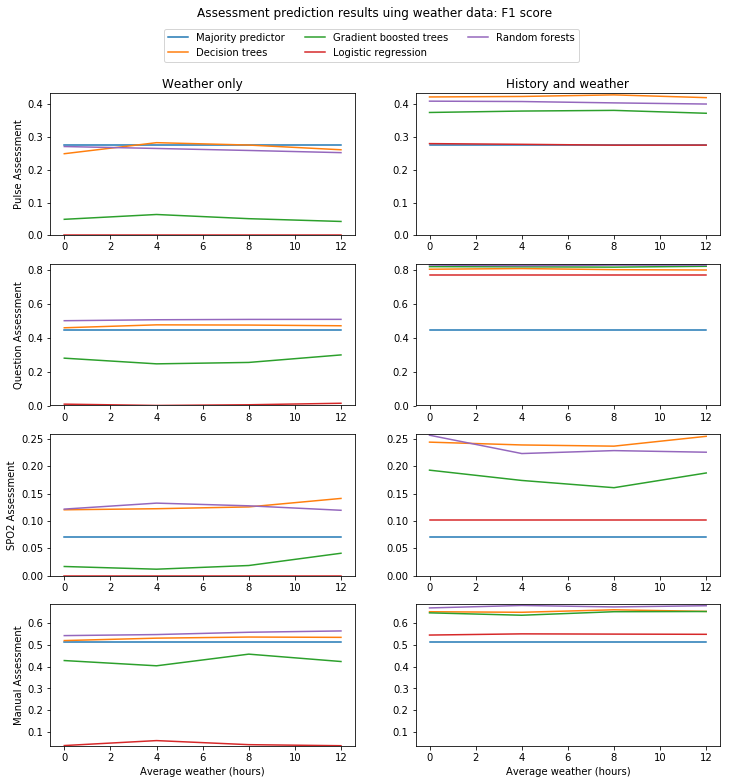

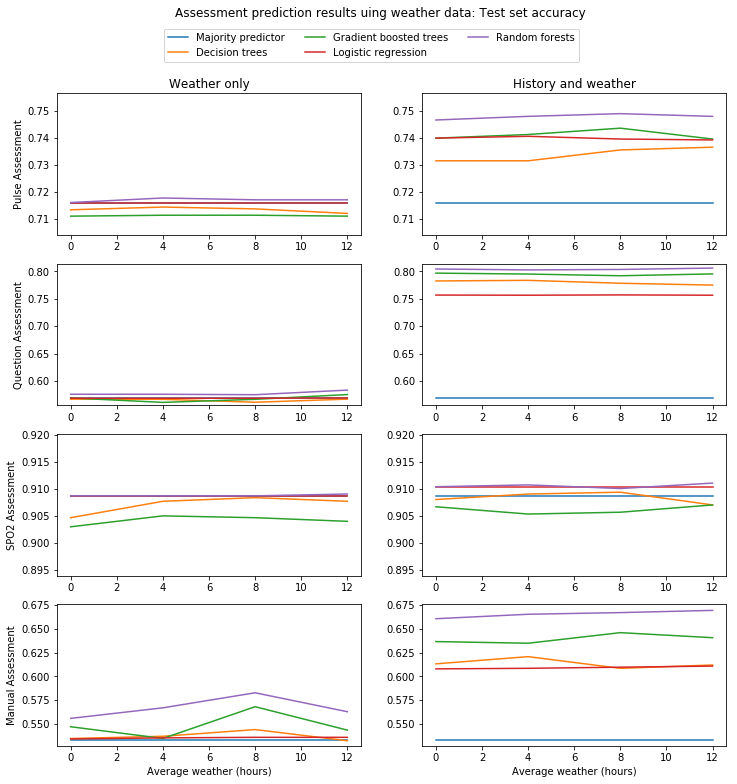

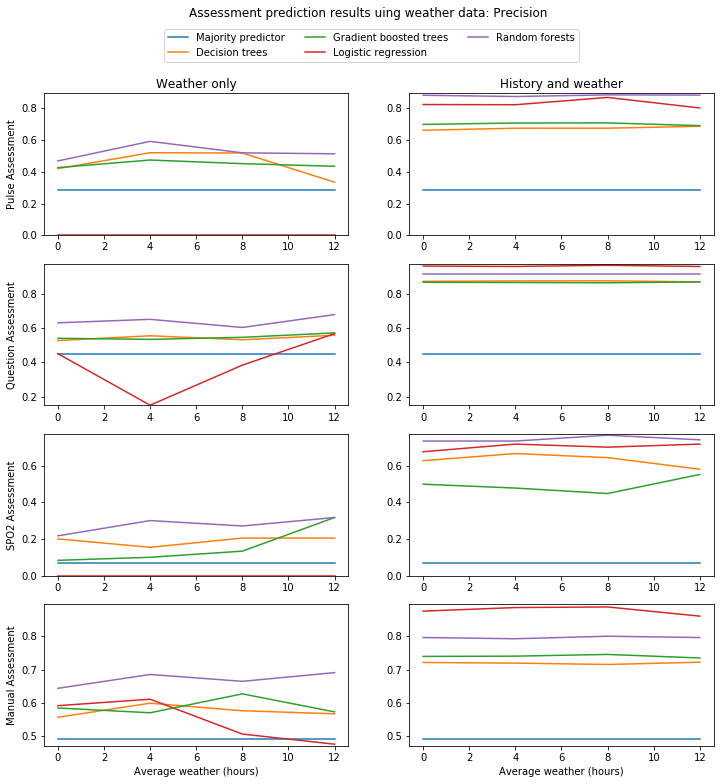

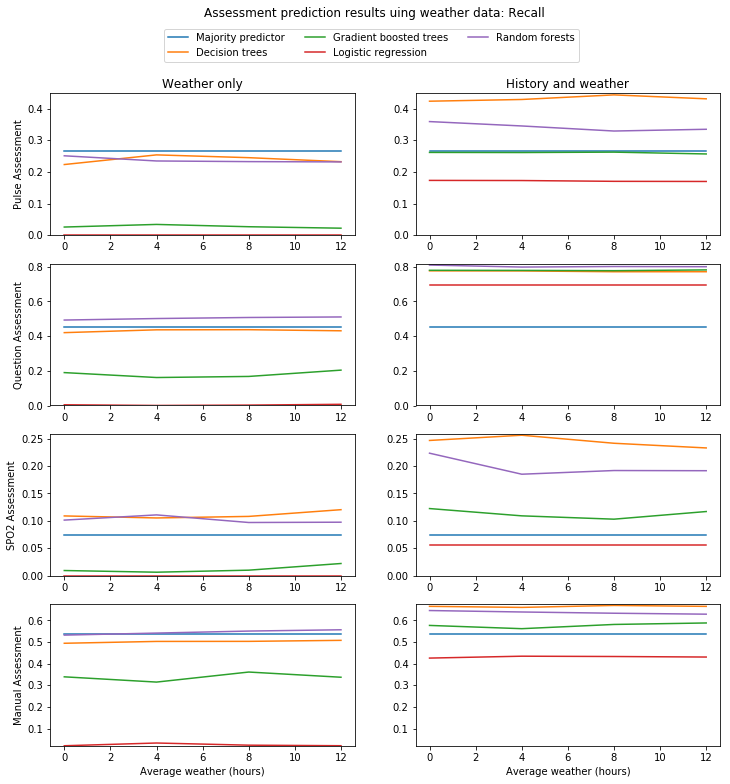

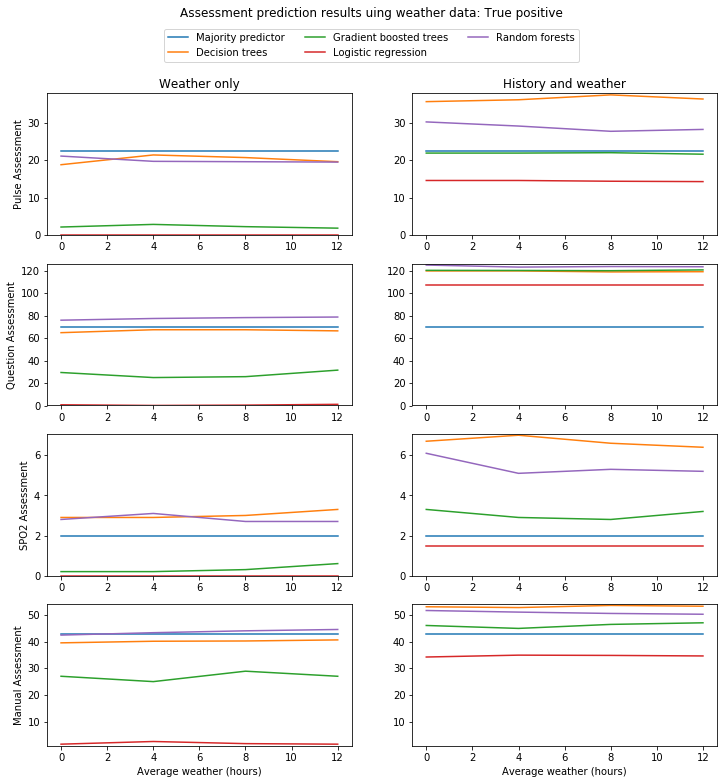

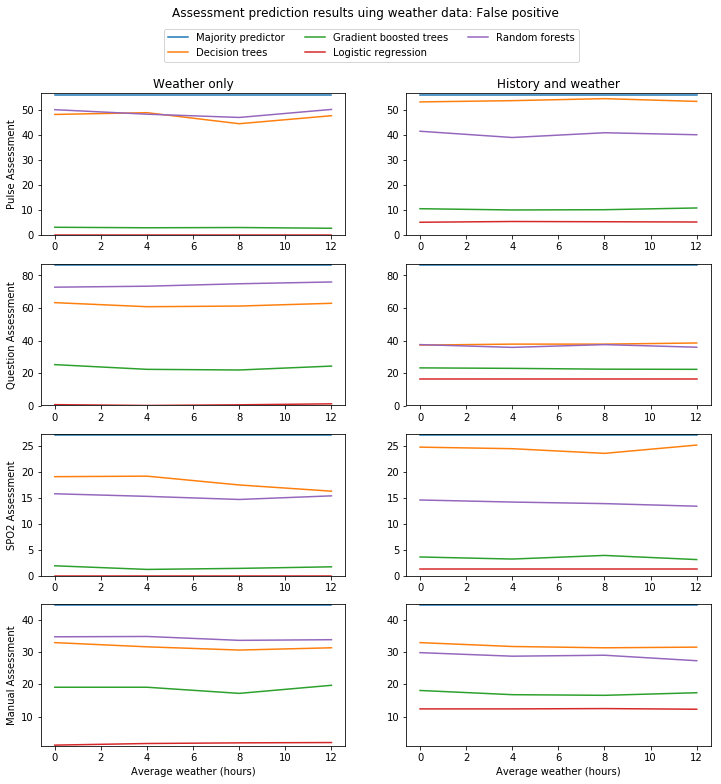

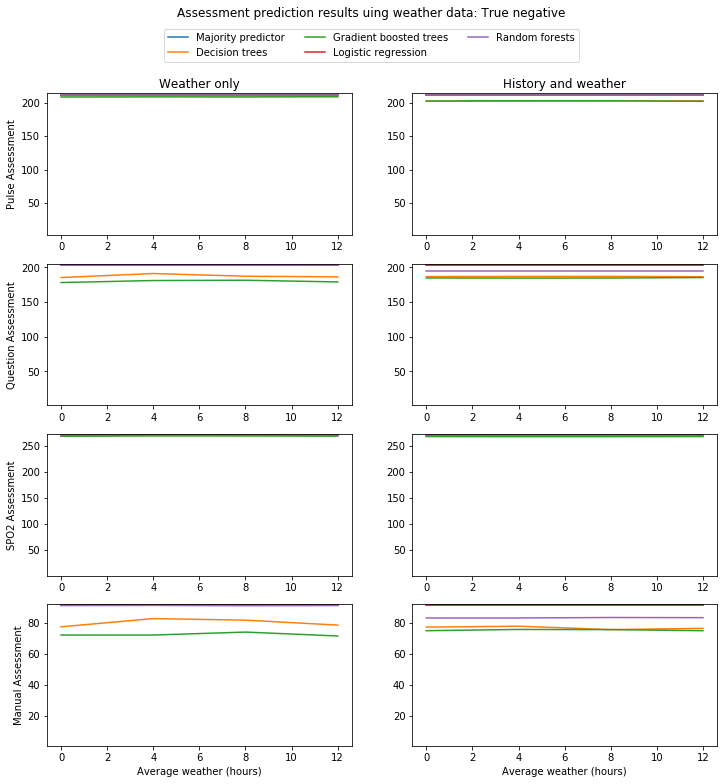

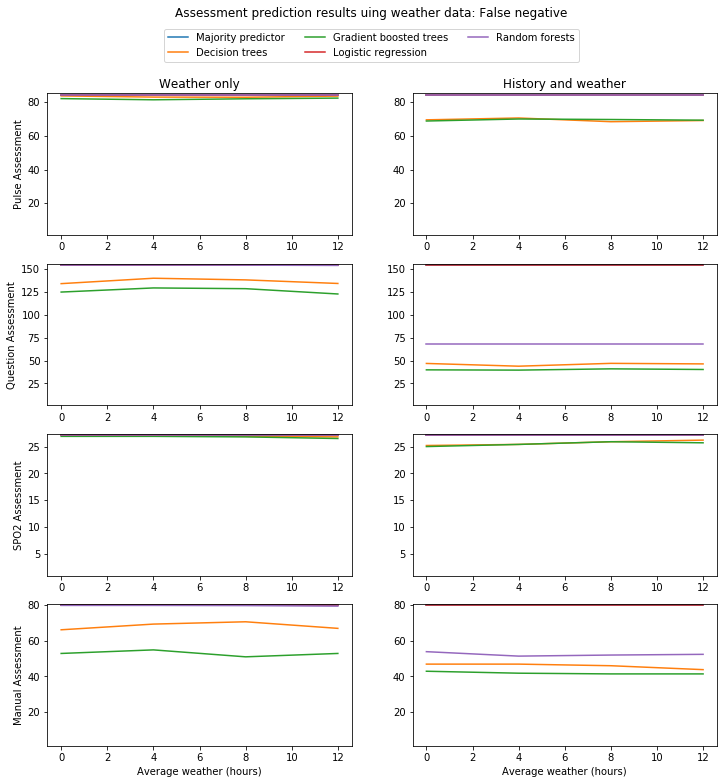

In [54]:
for parameter in readable_parameter_names.keys():
    f, ax = plt.subplots(len(triages), 2)
    f.set_size_inches(12,12)
    f.suptitle("Assessment prediction results uing weather data: "+readable_parameter_names[parameter])

    prediction_type_list = ["Weather only", "History and weather"]
    triage_list = list(triages.keys())

    for i in range(len(triage_list)):
        t = triage_list[i]
        ax[i,0].set_ylabel(t + " Assessment")
        cur_triage_df = triages[t]
        cur_triage_weather_only = cur_triage_df[cur_triage_df.Features=="Weather"]
        cur_triage_history_and_weather = cur_triage_df[cur_triage_df.Features=="Weather & History"]

        triage_by_predictor = (cur_triage_weather_only, cur_triage_history_and_weather)

        min_ylim = 1
        max_ylim = 0

        for j in range(len(triage_by_predictor)):
            cur_triage_by_predictor = triage_by_predictor[j]
            f1_by_model = cur_triage_by_predictor.groupby(["Weather_avg_h","Model"]).max()[parameter]
            min_ylim = np.min((min_ylim, np.min(f1_by_model)))
            max_ylim = np.max((max_ylim, np.max(f1_by_model)))
            f1_by_model_df = pd.DataFrame(f1_by_model)
            f1_by_model_df = f1_by_model_df.reset_index()
            legend_list = list()
            for m in f1_by_model_df["Model"].unique():
                legend_list.append(human_readable_model_name[m])
                cur_f1_by_model_df = f1_by_model_df[f1_by_model_df.Model==m]
                x = list()
                y = list()
                for h in sorted(cur_f1_by_model_df["Weather_avg_h"].unique()):
                    x.append(h)
                    y.append(list(cur_f1_by_model_df[cur_f1_by_model_df["Weather_avg_h"]==h][parameter])[0])
                ax[i,j].plot(x,y)
            if i==0 and j==0:
                f.legend(legend_list, loc='upper center',ncol=3, bbox_to_anchor=[0.43,0.88])
                
        for j in range(len(triage_by_predictor)):
            ax[i,j].set_ylim([min_ylim*0.99, max_ylim*1.01])

    for i in range(len(prediction_type_list)):
        ax[0,i].set_title(prediction_type_list[i])
        ax[-1,i].set_xlabel("Average weather (hours)")

    f.savefig(parameter+'_weather.png', bbox_inches='tight')
    plt.show(f)

In [18]:
# TODO summarize it
# TODO 